 This notebook illustrates kernelized ridge regression with RBF kernel

In [ ]:
import numpy as np
import scipy
from scipy.spatial import distance

"""
Constructs a Gram matrix from arrays x1 and x2 using the radial basis function (RBF) kernel
with standard deviation s.  I suggest use cdist from scipy.spatial distance 
"""
def rbf_kernel_matrix (x1, x2, s=1):


"""
 Algebraically solves the ridge regression for alpha given by
 y = (K + Lambda I) alpha 
""" 
def kernalized_ridge (Lambda, K, y):
    

"""
Computes the prediction for y given the regression estimate alpha and Gram matrix K 
from test data
"""
def prediction (alpha,K):
    

    



"""
Splits the data into a training set with numTrain elements,  
a validation set with numValidate elements, and the test set with 
the remaining elements
"""
def splitData (data , numTrain , numValidate):
    data_train = data [0: numTrain ]
    data_validation = data [ numTrain : numTrain + numValidate ]
    data_test = data [ numTrain + numValidate :]
    return data_train, data_validation, data_test

"""
samples features vector x and a response vector y  from
 x ~ N(0,s1^2) iid
 y ~ f(x) + N(0,s2^2) iid

I suggest using np.random.seed (for debugging) and np.random.normal 
"""
def distribution (numData, f, s1, s2): 
    np.random.seed(1)
    x = np.random.normal(0,s1,(numData,1))
    y = f(x) + np.random.normal(0,s2,(numData,1)) 
    return x, y


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


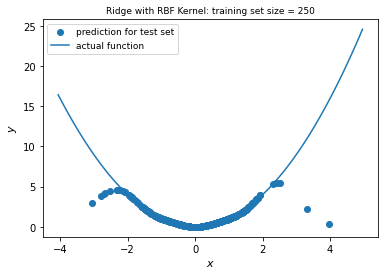

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, subplot


# data generating function
def f(x):
    return x**2


numData = 1000   # size of the entire data set, 
numTrain = 250   # test set size
numValidate = 250 # validation set size (we will not be using validation in this exericse)

x_min = -4
x_max = 4

# Generate the design matrix X, response vector y, and the kernel matrix 
# for training, validation and test sets
s1 = 10
s2 = 10
x, y =distribution (numData, f, s1, s2) 

x_train , x_validation , x_test = splitData (x, numTrain, numValidate)
y_train , y_validation , y_test = splitData (y, numTrain, numValidate)

K_train = rbf_kernel_matrix(x_train, x_train)
K_test = rbf_kernel_matrix (x_train, x_test)

# Apply the ridge regressions to the training set
Lambda =0.1
alpha = kernalized_ridge (Lambda, K_train, y_train)

# Determine the predictions for the test set
y_bar = prediction (alpha, K_test) 

# Plot the predictions and actual values
fig, (ax) = plt.subplots(1, 1) 

x_min, x_max = x_test.min() - 1, x_test.max() + 1
x_actual = np.linspace(x_min,x_max,100) # 100 linearly spaced numbers
y_actual = f(x_actual)

prediction = ax.scatter (x_test, np.transpose(y_bar), label = 'prediction for test set')
actual, = ax.plot (x_actual, y_actual, label = 'actual function')

ax.set_ylabel(r"$y$", fontsize=11)
ax.set_xlabel(r"$x$", fontsize=11)
ax.set_title('Ridge with RBF Kernel: training set size = %s'% numTrain, fontsize=9)  
ax.axis('tight')
ax.legend(handles=[prediction, actual], fontsize=9)

plt.show()